In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [189]:
df=pd.read_excel("C:/Users/nikit/Downloads/family doc/CRM/Nikita/Nikita CR/Data preparation(1)/5721-Training_dataset.xlsx")
df

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.000,0.000,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.000,0.000,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.000,0.000,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.000,0.000,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.000,0.000,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,310027,1736,2.1740,0.000,0.000,0.000,11,4248,1577,13379,...,0,missing,78.378,0,4,0.43829,na,0,C,0
79996,310028,1724,0.0000,1.108,0.768,0.000,missing,64041,missing,10926,...,0,missing,38.325,0.16667,14,0.57931,0,0,C,0
79997,310029,1605,0.2901,11.561,0.937,2.976,missing,2277,missing,3964,...,2,101.85,93.142,0.5,4,0.42069,na,0,C,1
79998,310030,1780,1.1874,0.000,0.000,0.000,0,6356,4802,3206,...,0,missing,77.022,0.06061,9,0.53251,na,0,L,0


In [190]:
dictionary=pd.read_excel("C:/Users/nikit/Downloads/family doc/CRM/Nikita/Nikita CR/Data preparation(1)/5721-Training_dataset.xlsx",sheet_name='Dictionary')
dictionary

,Name,Definition
0,application_key,Application ID (primary key)
1,mvar1,Credit worthiness score calculated on the basi...
2,mvar2,A score calculated based on the number and ris...
3,mvar3,Severity of default by the borrower on any loa...
4,mvar4,Severity of default by the borrower on auto lo...
5,mvar5,Severity of default by the borrower on educati...
6,mvar6,Minimum of credit available on all revolving c...
7,mvar7,Maximum of credit available on all active cred...
8,mvar8,Maximum of credit available on all active revo...
9,mvar9,Sum of available credit on credit cards that t...


**Catagorical Columns**

In [191]:
cat = []

for col in df.columns:
    if df[col].nunique() <= 2:
        cat.append(col)

cat


['mvar47', 'default_ind']

**Numerical Columns**

In [192]:
num=df.drop(['mvar47', 'default_ind'],axis=1).columns
num

Index(['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46'],
      dtype='object')

# Exploratory Data Analysis

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  80000 non-null  int64  
 1   mvar1            80000 non-null  object 
 2   mvar2            74447 non-null  float64
 3   mvar3            79499 non-null  float64
 4   mvar4            79499 non-null  float64
 5   mvar5            79499 non-null  float64
 6   mvar6            80000 non-null  object 
 7   mvar7            80000 non-null  object 
 8   mvar8            80000 non-null  object 
 9   mvar9            80000 non-null  object 
 10  mvar10           80000 non-null  object 
 11  mvar11           80000 non-null  object 
 12  mvar12           80000 non-null  object 
 13  mvar13           80000 non-null  object 
 14  mvar14           80000 non-null  int64  
 15  mvar15           80000 non-null  object 
 16  mvar16           80000 non-null  object 
 17  mvar17      

In [194]:
df.shape

(80000, 49)

In [195]:
df.describe()

,application_key,mvar2,mvar3,mvar4,mvar5,mvar14,mvar21,mvar22,mvar23,mvar24,mvar33,mvar44,default_ind
count,80000.000000,74447.000000,79499.000000,79499.000000,79499.00000,8.000000e+04,57439.000000,50876.000000,39752.000000,61098.000000,78249.000000,72255.000000,80000.000000
mean,270031.500000,1.105629,5.280955,0.474516,1.12472,1.960918e+05,57.790097,4423.856509,4305.929828,69.981834,6.996557,0.705285,0.246213
std,23094.155105,1.645299,10.815463,1.796261,5.99545,7.888377e+06,35.577165,3782.048321,3864.873106,300.080442,7.650139,0.245879,0.430806
min,230032.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.170000,0.000000,0.000000,0.000000,0.083300,0.060660,0.000000
25%,250031.750000,0.140100,0.000000,0.000000,0.00000,4.261300e+04,26.930000,726.715000,541.157500,9.892500,1.166700,0.515220,0.000000
50%,270031.500000,0.538900,0.300000,0.000000,0.00000,7.234300e+04,59.690000,3974.425000,3700.000000,40.440000,3.916700,0.737030,0.000000
75%,290031.250000,1.445050,6.447000,0.000000,0.00000,1.238750e+05,86.620000,7579.297500,7520.950000,76.540000,10.666700,0.943475,0.000000
max,310031.000000,44.630100,286.858000,114.696000,226.52700,9.910000e+08,1305.250000,64800.000000,124533.330000,27867.400000,76.000000,1.000000,1.000000


In [196]:
df.size

3920000

In [197]:
df.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [198]:
df.tail()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
79995,310027,1736,2.1740,0.000,0.000,0.000,11,4248,1577,13379,...,0,missing,78.378,0,4,0.43829,na,0,C,0
79996,310028,1724,0.0000,1.108,0.768,0.000,missing,64041,missing,10926,...,0,missing,38.325,0.16667,14,0.57931,0,0,C,0
79997,310029,1605,0.2901,11.561,0.937,2.976,missing,2277,missing,3964,...,2,101.85,93.142,0.5,4,0.42069,na,0,C,1
79998,310030,1780,1.1874,0.000,0.000,0.000,0,6356,4802,3206,...,0,missing,77.022,0.06061,9,0.53251,na,0,L,0
79999,310031,1727,1.9288,1.441,0.000,0.000,0,25773,2869,132985,...,0,32.4,missing,0.07143,12,0.68482,0,0,C,1


In [199]:
df.columns

Index(['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar47',
       'default_ind'],
      dtype='object')

In [200]:
df.dtypes

application_key      int64
mvar1               object
mvar2              float64
mvar3              float64
mvar4              float64
mvar5              float64
mvar6               object
mvar7               object
mvar8               object
mvar9               object
mvar10              object
mvar11              object
mvar12              object
mvar13              object
mvar14               int64
mvar15              object
mvar16              object
mvar17              object
mvar18              object
mvar19              object
mvar20              object
mvar21             float64
mvar22             float64
mvar23             float64
mvar24             float64
mvar25              object
mvar26              object
mvar27              object
mvar28              object
mvar29              object
mvar30              object
mvar31              object
mvar32              object
mvar33             float64
mvar34              object
mvar35              object
mvar36              object
m

**Drop unwanted column**

In [201]:
type(df)

pandas.core.frame.DataFrame

In [202]:
df.drop(columns=['application_key'],inplace=True)
df.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47', 'default_ind'],
      dtype='object')

# Check Missing rate

In [203]:
# Standardizing string-based missing values (e.g., 'NA', 'N/A', blanks) to NaN

df.replace(
    ['NA', 'Na', 'na', 'N/A', 'n/a', 'missing', '', ' '],
    np.nan,
    inplace=True
)
df = df.infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True)


In [204]:
missing_rate=df.isnull().mean()*100
missing_rate

mvar1           4.54875
mvar2           6.94125
mvar3           0.62625
mvar4           0.62625
mvar5           0.62625
mvar6          23.70500
mvar7           9.24250
mvar8          23.70500
mvar9          14.26000
mvar10          0.62750
mvar11         56.02375
mvar12         17.59750
mvar13         10.44000
mvar14          0.00000
mvar15         40.08375
mvar16         23.13750
mvar17         19.80750
mvar18         18.46375
mvar19          0.00500
mvar20          0.62750
mvar21         28.20125
mvar22         36.40500
mvar23         50.31000
mvar24         23.62750
mvar25          9.63250
mvar26         13.26250
mvar27         16.51125
mvar28          0.62750
mvar29          0.62750
mvar30         45.52125
mvar31         70.27250
mvar32          9.63250
mvar33          2.18875
mvar34          0.62750
mvar35         41.26750
mvar36          3.62250
mvar37          9.63250
mvar38          0.62750
mvar39          7.55000
mvar40         78.19625
mvar41         68.22250
mvar42          

**Count no. of null values in each columns**

In [205]:
for i in df.columns.tolist():
    print(i,':',df[i].isnull().sum())

mvar1 : 3639
mvar2 : 5553
mvar3 : 501
mvar4 : 501
mvar5 : 501
mvar6 : 18964
mvar7 : 7394
mvar8 : 18964
mvar9 : 11408
mvar10 : 502
mvar11 : 44819
mvar12 : 14078
mvar13 : 8352
mvar14 : 0
mvar15 : 32067
mvar16 : 18510
mvar17 : 15846
mvar18 : 14771
mvar19 : 4
mvar20 : 502
mvar21 : 22561
mvar22 : 29124
mvar23 : 40248
mvar24 : 18902
mvar25 : 7706
mvar26 : 10610
mvar27 : 13209
mvar28 : 502
mvar29 : 502
mvar30 : 36417
mvar31 : 56218
mvar32 : 7706
mvar33 : 1751
mvar34 : 502
mvar35 : 33014
mvar36 : 2898
mvar37 : 7706
mvar38 : 502
mvar39 : 6040
mvar40 : 62557
mvar41 : 54578
mvar42 : 1901
mvar43 : 818
mvar44 : 7745
mvar45 : 44855
mvar46 : 22789
mvar47 : 0
default_ind : 0


**Null handling**


In [206]:
num_df = df.drop(columns=['mvar47', 'default_ind'])
num_df.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46'],
      dtype='object')

In [207]:
missing_rate=num_df.isnull().mean()*100

In [208]:
median_vars = missing_rate[missing_rate < 15].index.tolist()
knn_vars = missing_rate[(missing_rate >= 15) & (missing_rate < 40)].index.tolist()
drop_vars = missing_rate[missing_rate >= 40].index.tolist()


In [209]:
#for median imputation
for col in median_vars:
    df[col] = df[col].fillna(df[col].median())

In [210]:
# drop high missing rate variable  
df.drop(columns=drop_vars, inplace=True, errors='ignore')


In [211]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[knn_vars] = scaler.fit_transform(df[knn_vars])

imputer = KNNImputer(n_neighbors=5, weights='distance')
df[knn_vars] = imputer.fit_transform(df[knn_vars])

**Rechecking missing rate for each columns**


In [212]:
missing_rate=df.isnull().mean()*100
missing_rate

mvar1          0.0
mvar2          0.0
mvar3          0.0
mvar4          0.0
mvar5          0.0
mvar6          0.0
mvar7          0.0
mvar8          0.0
mvar9          0.0
mvar10         0.0
mvar12         0.0
mvar13         0.0
mvar14         0.0
mvar16         0.0
mvar17         0.0
mvar18         0.0
mvar19         0.0
mvar20         0.0
mvar21         0.0
mvar22         0.0
mvar24         0.0
mvar25         0.0
mvar26         0.0
mvar27         0.0
mvar28         0.0
mvar29         0.0
mvar32         0.0
mvar33         0.0
mvar34         0.0
mvar36         0.0
mvar37         0.0
mvar38         0.0
mvar39         0.0
mvar42         0.0
mvar43         0.0
mvar44         0.0
mvar46         0.0
mvar47         0.0
default_ind    0.0
dtype: float64

In [213]:
num_df = df.drop(columns=['mvar47', 'default_ind'])

In [214]:
num_df.head(10)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar33,mvar34,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46
0,1696.0,1.6541,0.000,0.0,0.0,-4.338190e-01,6015.0,-6.370361e-01,40369.0,18414.0,...,1.1667,1.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,-2.777630e-01
1,1846.0,0.8095,0.000,0.0,0.0,-4.062784e-01,7532.0,-3.557274e-01,18234.0,13664.0,...,0.4167,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,2.033670e+00
2,1745.0,0.4001,0.000,0.0,0.0,-2.866658e-01,2536.0,4.493963e-03,14171.0,2536.0,...,25.0833,0.0,1.0,3.0,1.0,0.0,0.00000,1.0,1.00000,-2.777630e-01
3,1739.0,0.2193,0.000,0.0,0.0,1.013325e-01,26440.0,-1.795762e-01,20316.0,37013.0,...,10.3333,0.0,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,-2.777630e-01
4,1787.0,0.0118,0.225,0.0,0.0,1.037983e+00,5494.0,-1.263556e-01,7987.0,4696.0,...,0.9167,0.0,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,3.000952e-01
5,1579.0,0.5389,3.502,0.0,0.0,-1.164137e-17,6967.0,-6.519168e-18,14171.0,0.0,...,1.3333,0.0,2.0,3.0,2.0,0.0,1.50000,0.0,0.73703,3.129761e-17
6,1818.0,0.4001,0.000,0.0,0.0,-1.266711e-01,1088.0,-5.565081e-01,1536.0,1498.0,...,9.3333,0.0,2.0,0.0,0.0,0.0,0.00000,2.0,0.87224,-2.777630e-01
7,1742.0,0.5389,0.300,0.0,0.0,-1.164137e-17,6967.0,-6.519168e-18,14171.0,9492.5,...,0.0833,0.0,5.0,3.0,3.0,0.0,0.20000,5.0,0.73703,3.129761e-17
8,1836.0,0.1358,0.000,0.0,0.0,-3.401270e-01,38964.0,1.091497e+00,70729.0,65843.0,...,5.9167,0.0,6.0,12.0,2.0,0.0,0.00000,10.0,0.89868,-2.777630e-01
9,1839.0,0.1981,0.000,0.0,0.0,-2.197044e-01,6131.0,-7.195013e-02,48959.0,31640.0,...,1.7500,0.0,10.0,7.0,0.0,0.0,0.08824,14.0,0.33834,-2.777630e-01


**Histogram plot for each numerical variable**

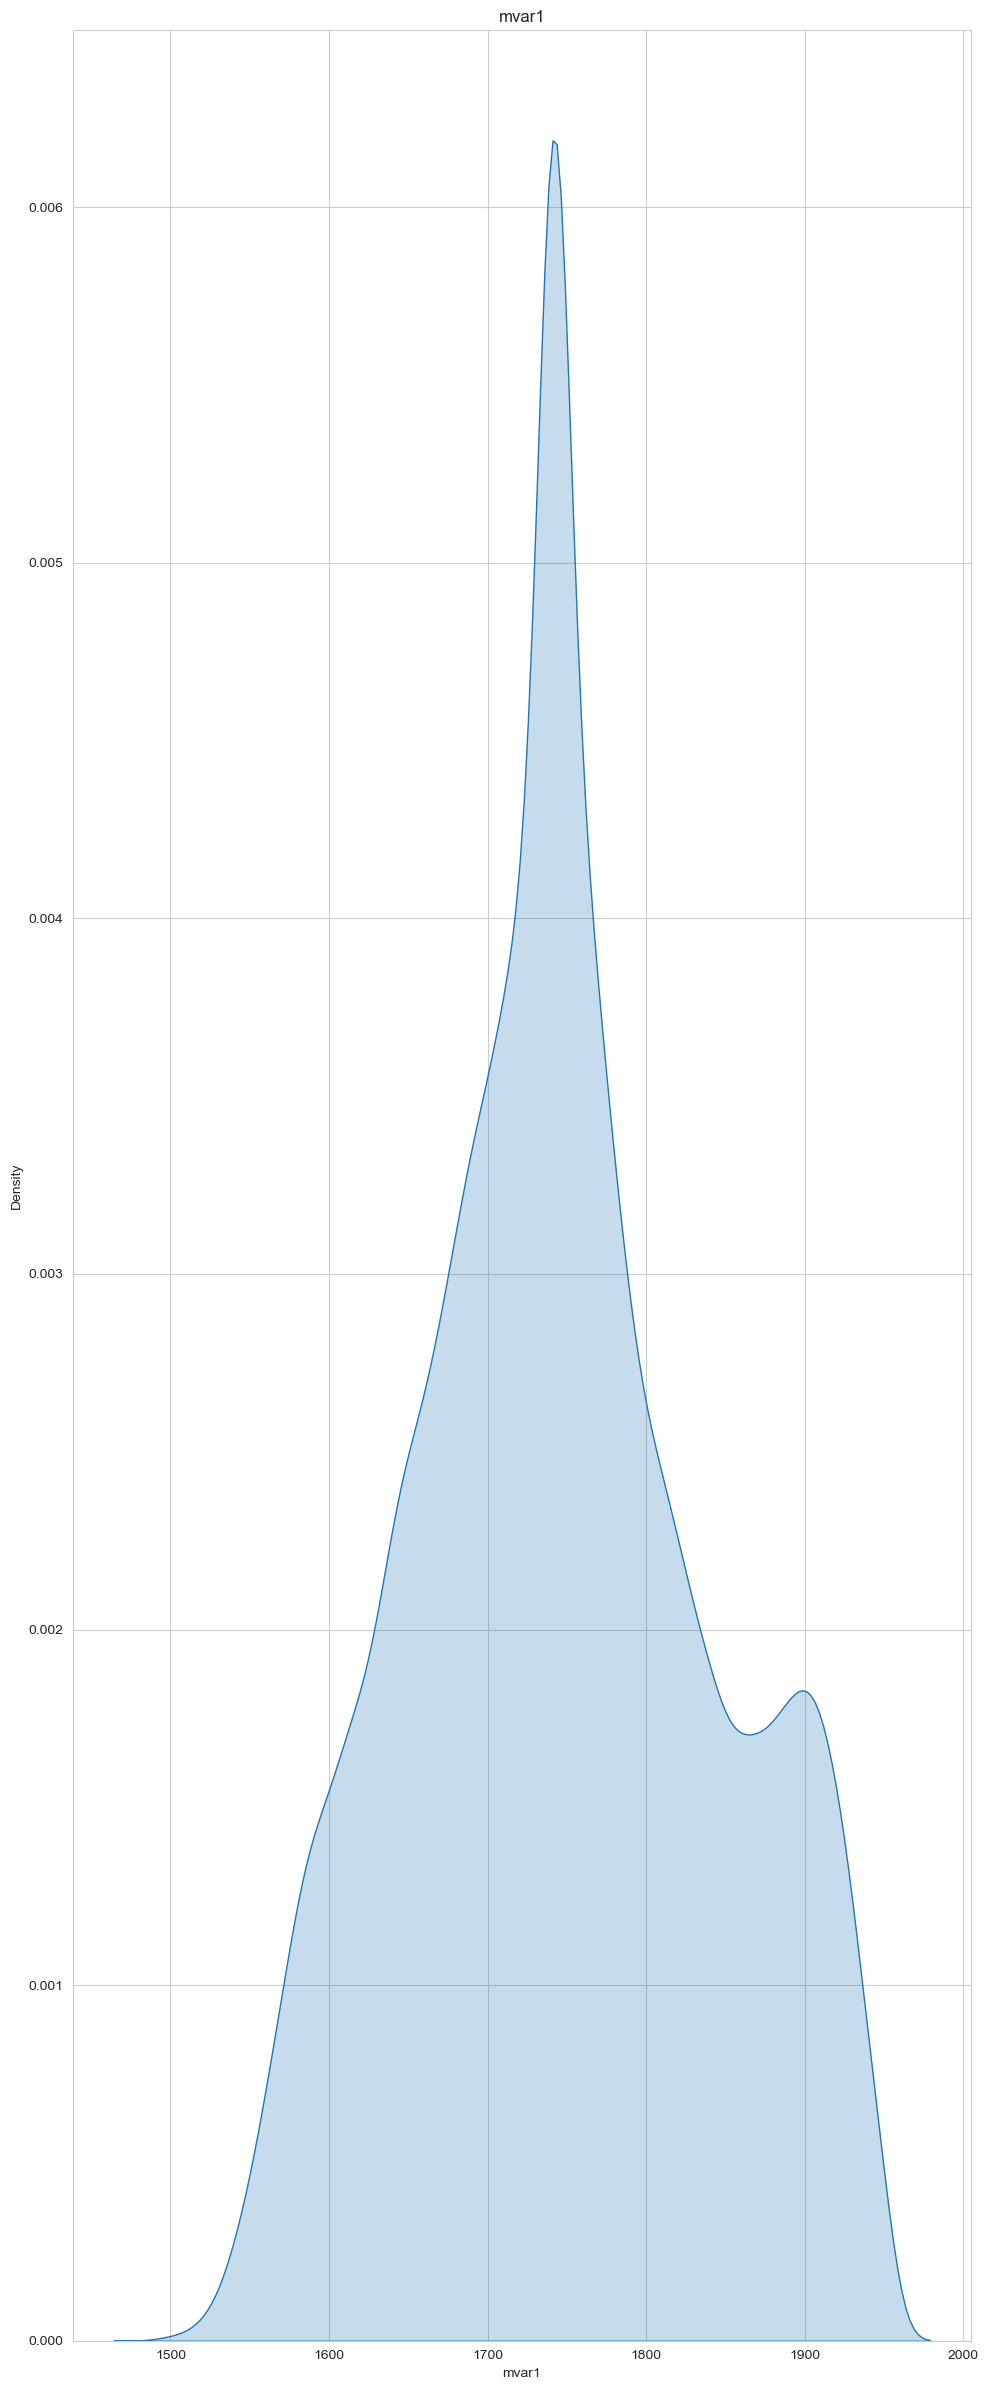

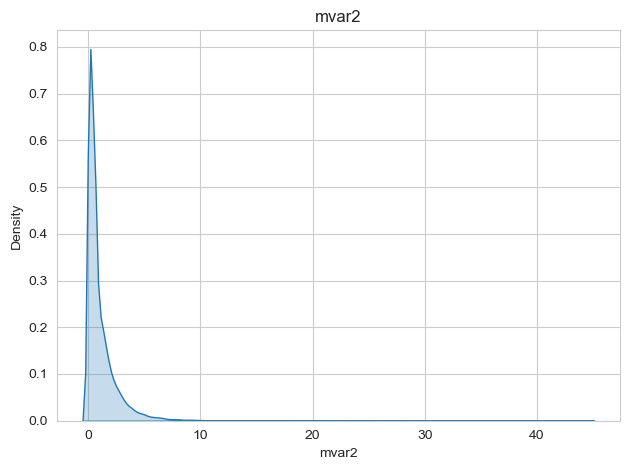

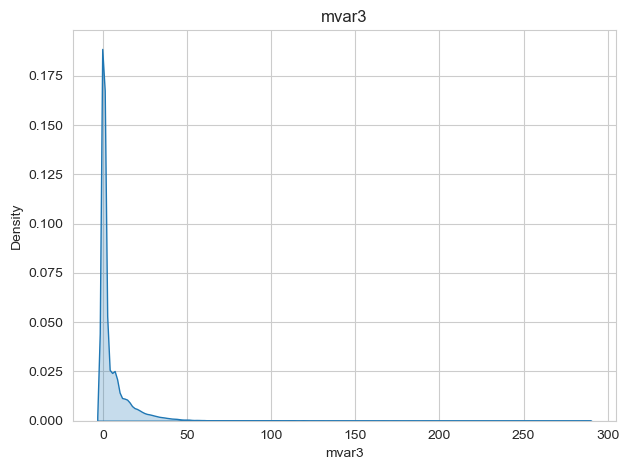

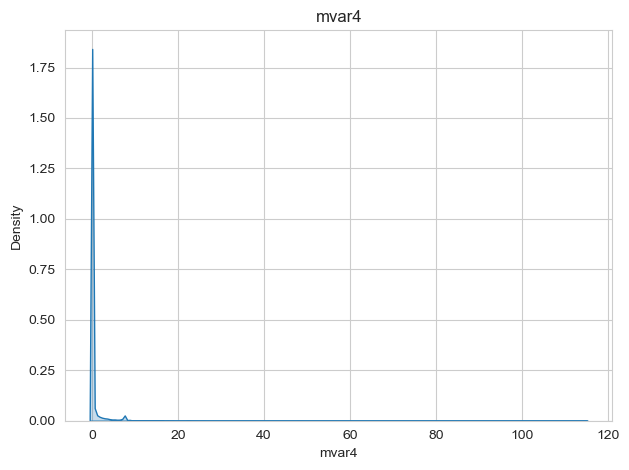

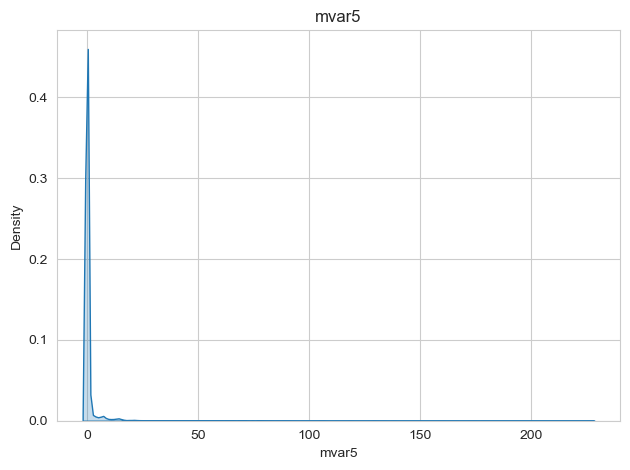

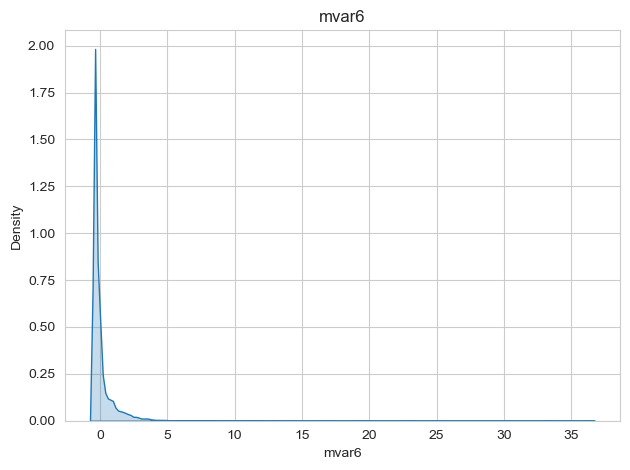

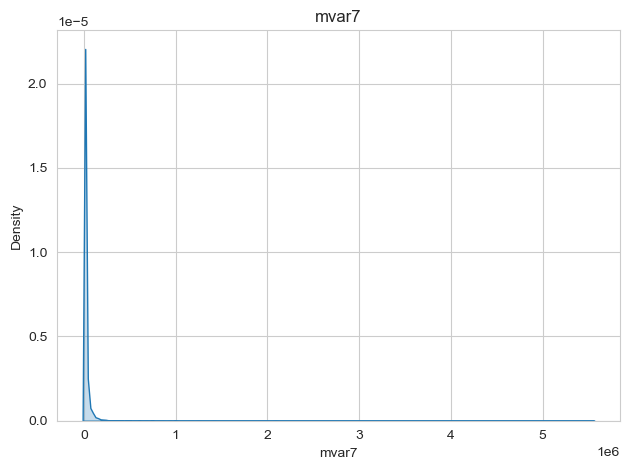

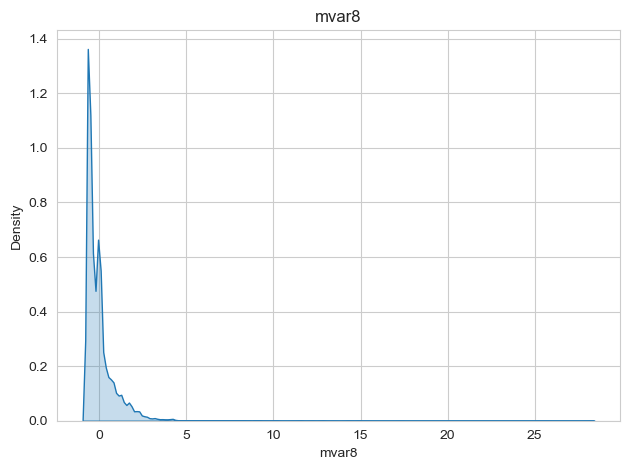

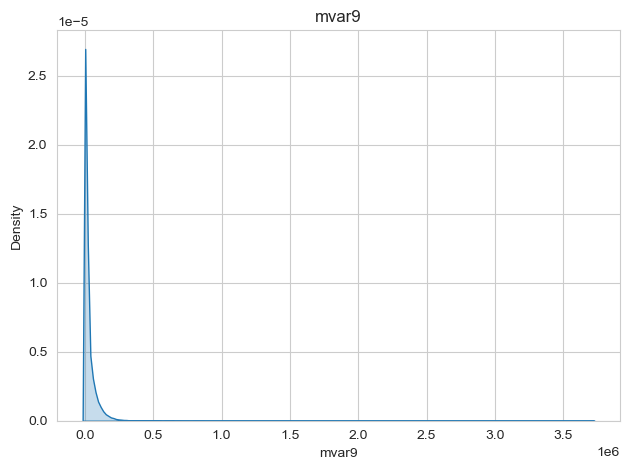

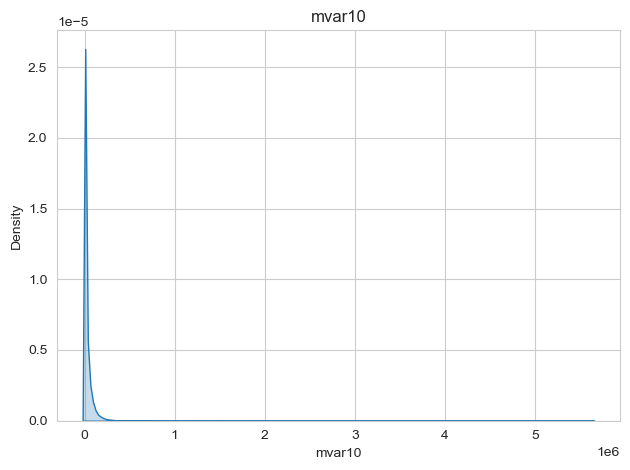

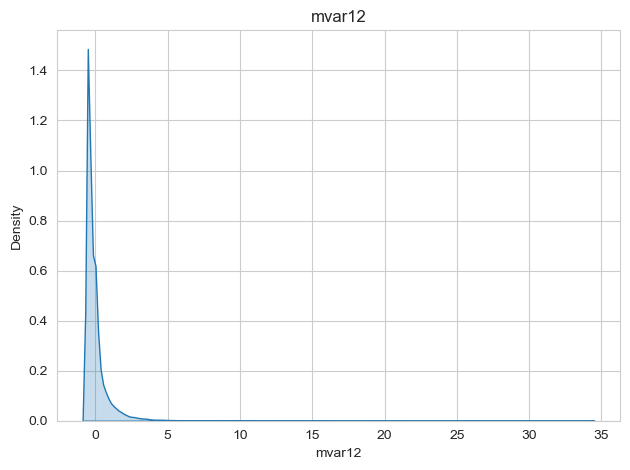

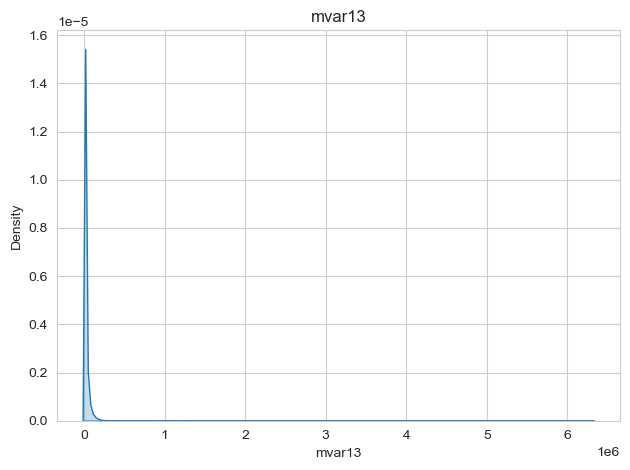

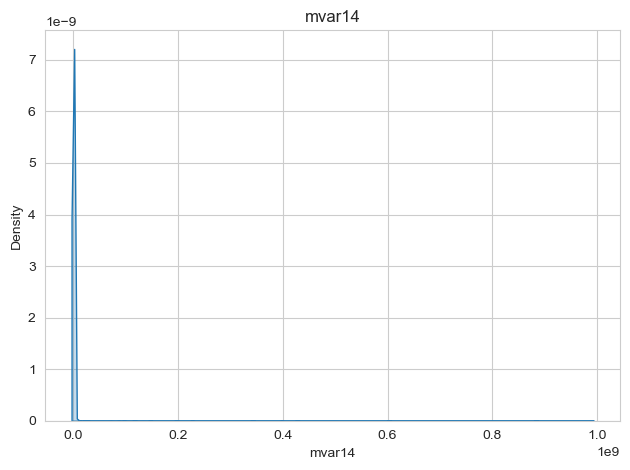

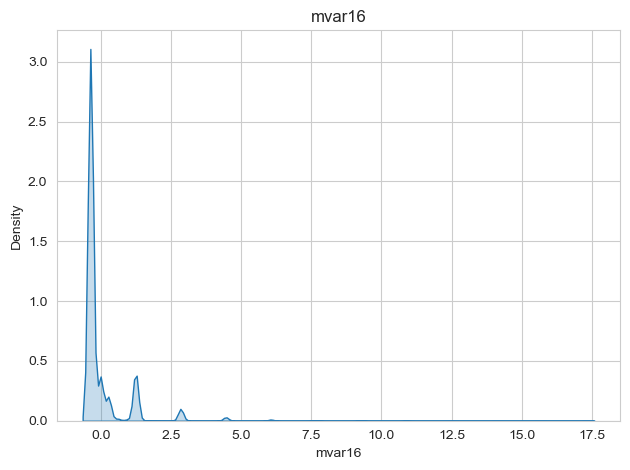

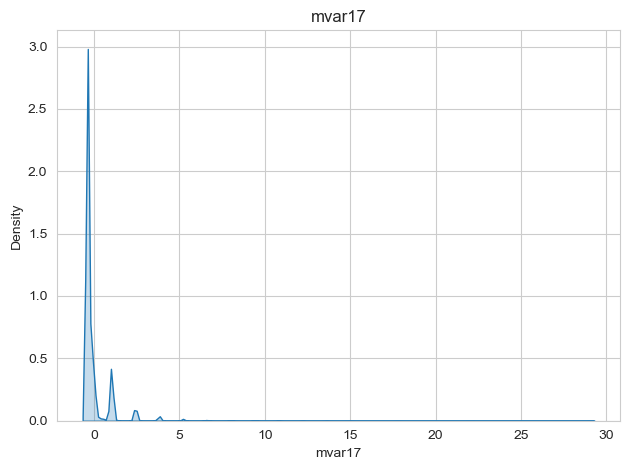

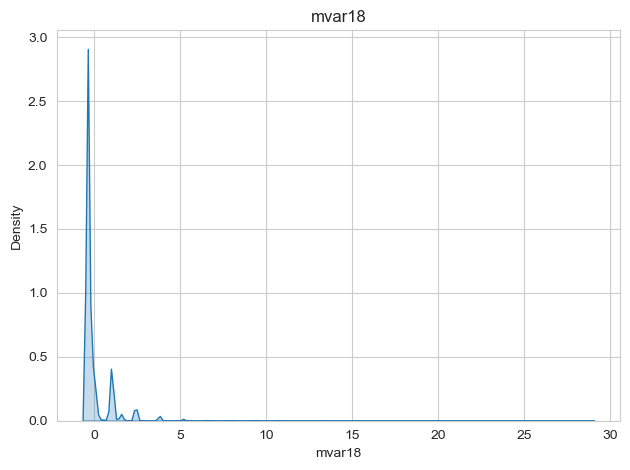

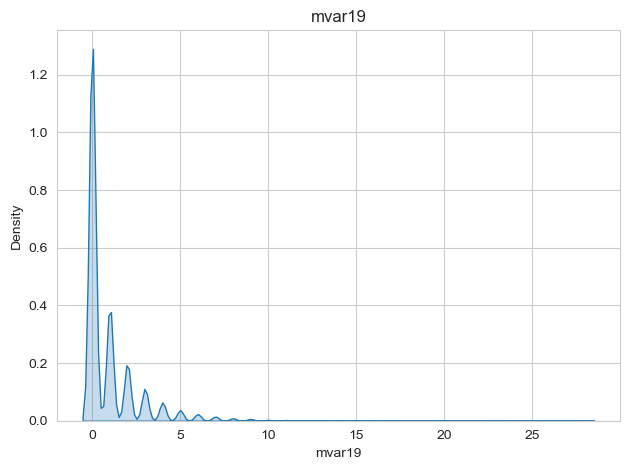

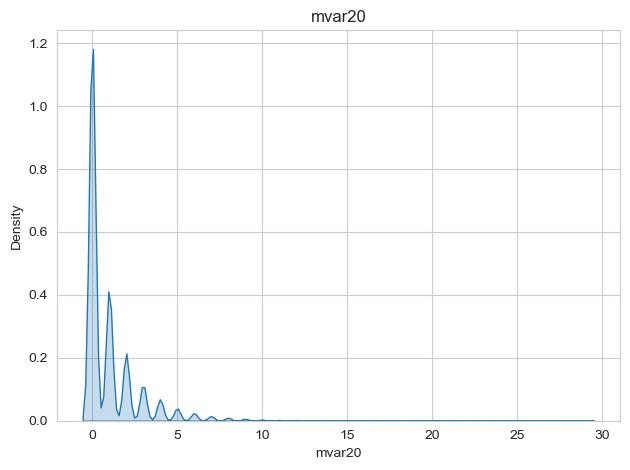

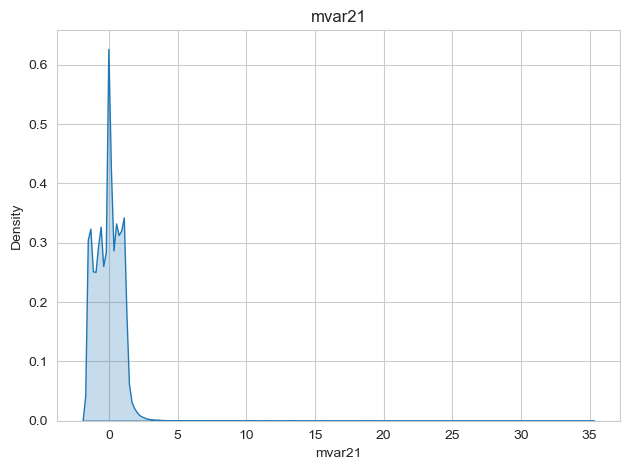

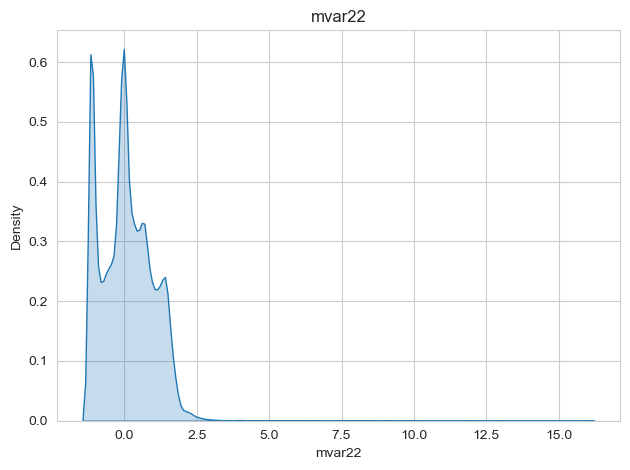

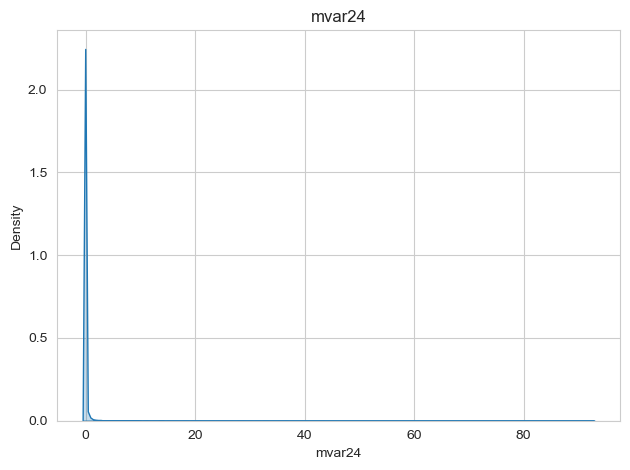

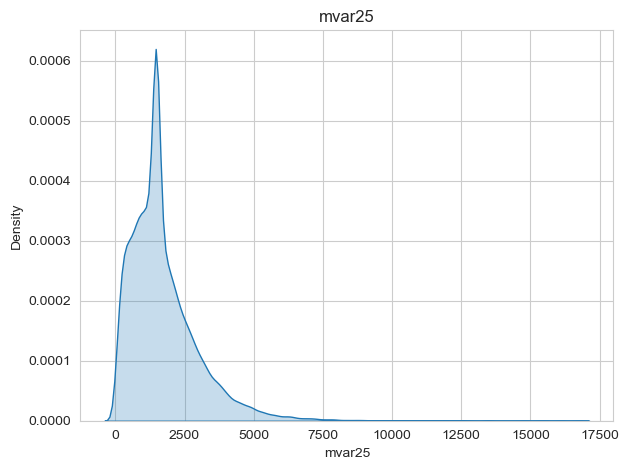

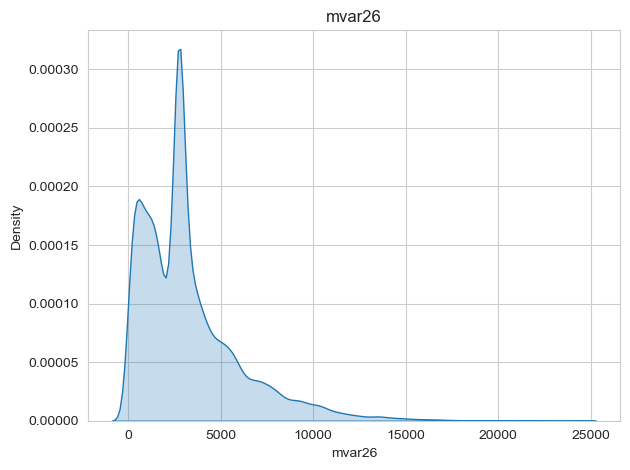

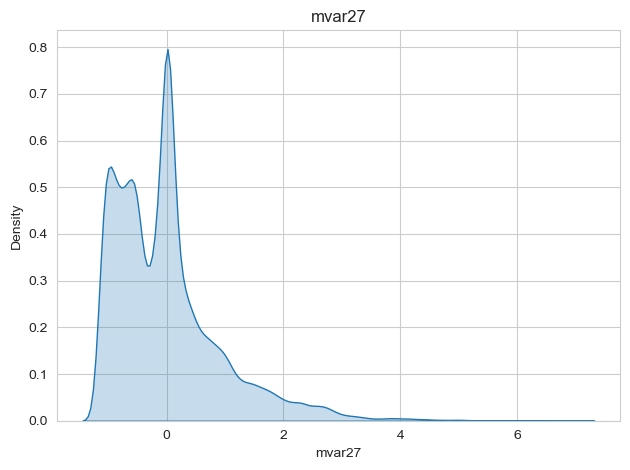

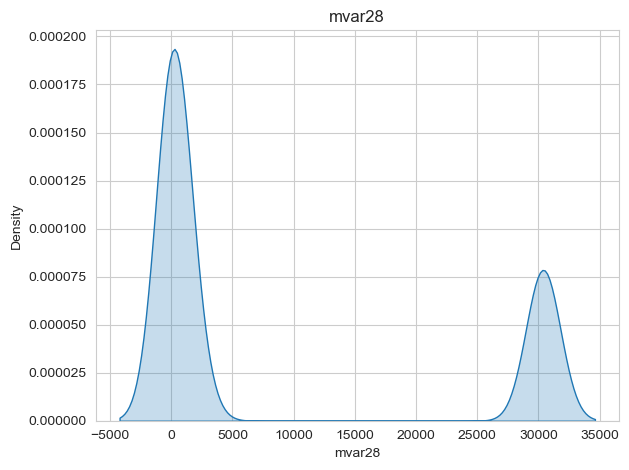

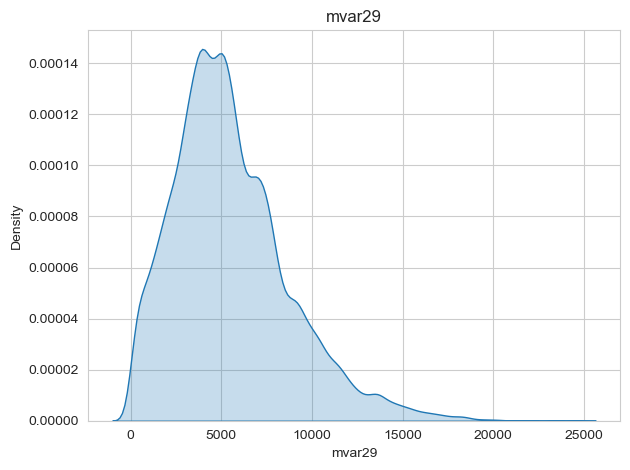

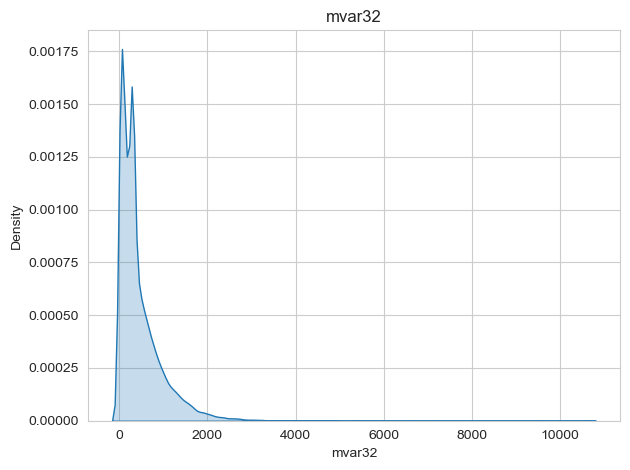

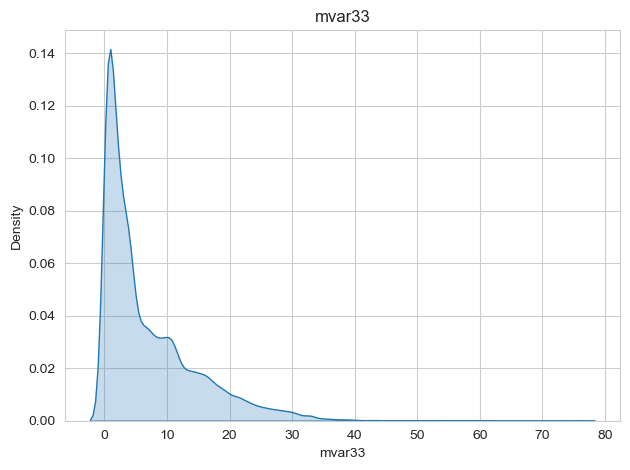

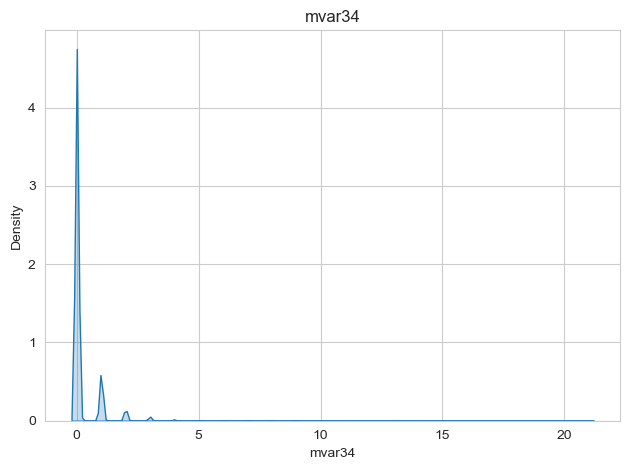

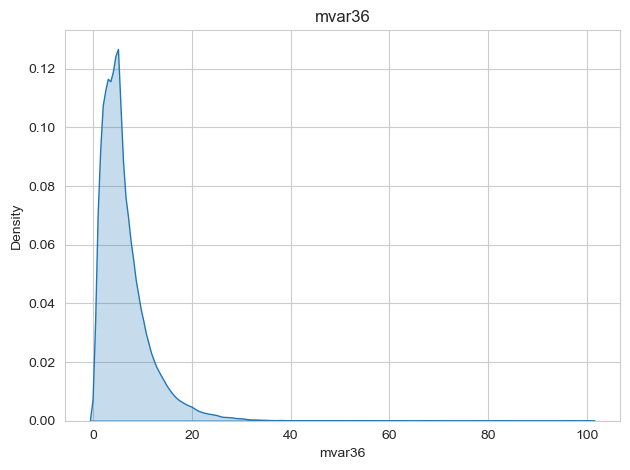

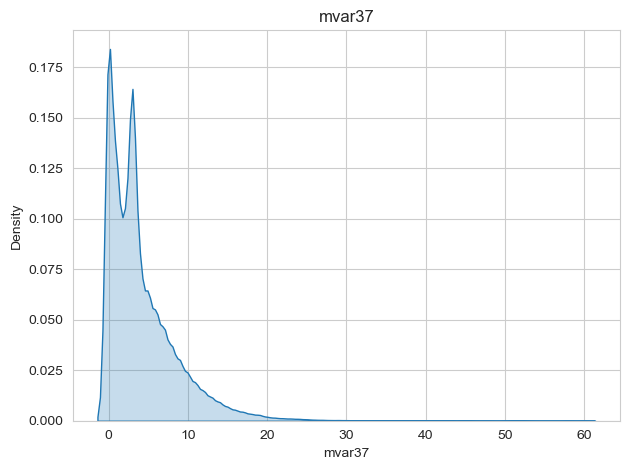

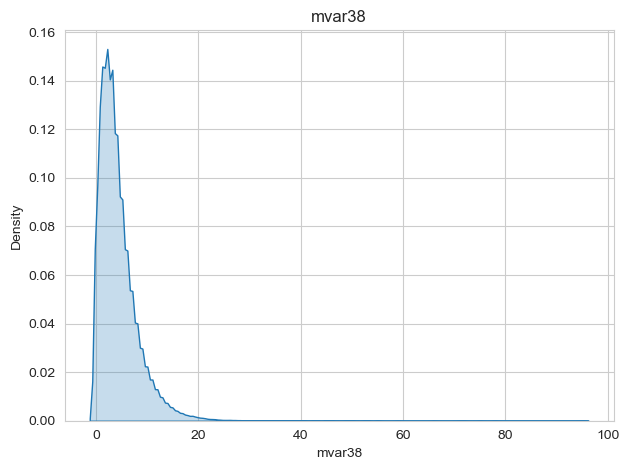

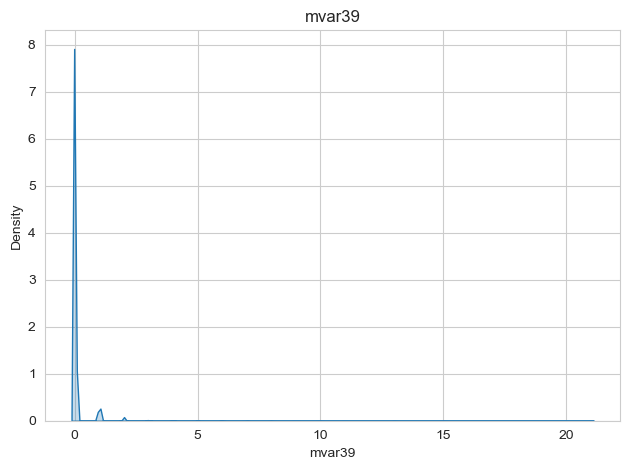

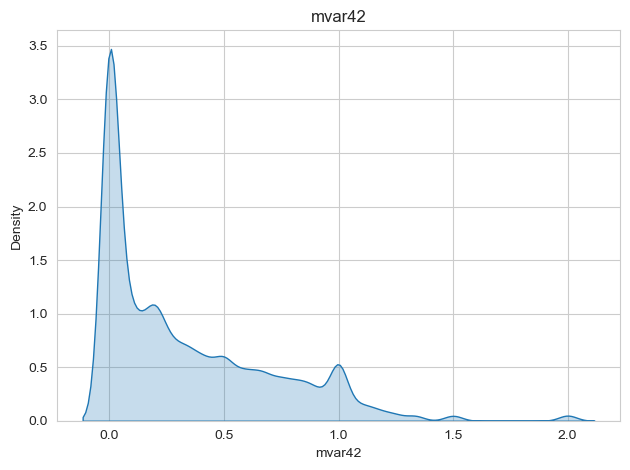

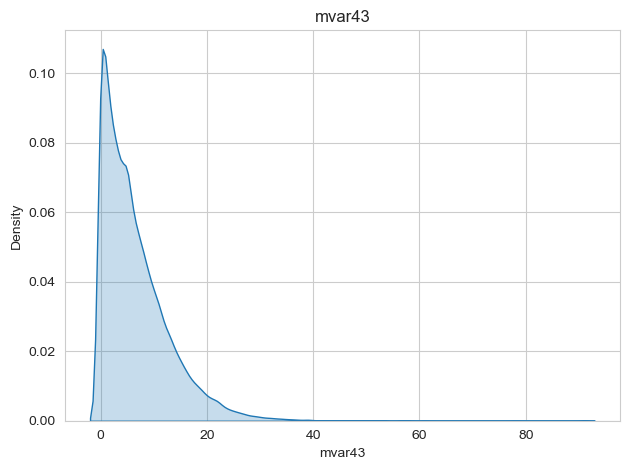

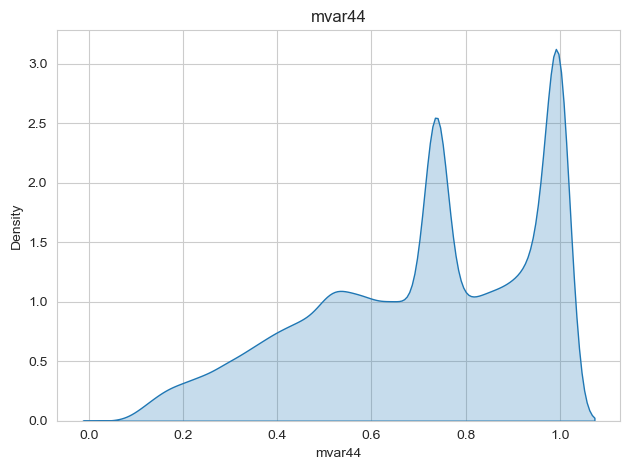

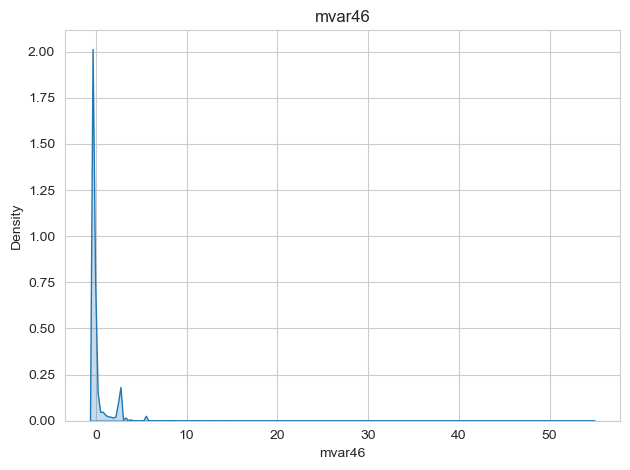

In [215]:
import math
rows=math.ceil(len(num)/2)
num = num_df.select_dtypes(include='number').columns
plt.figure(figsize=(10,rows))
sns.set_style('whitegrid')
for i,j in enumerate(num):
    sns.kdeplot(data=num_df,x=j,fill=True)
    plt.title(j)
    plt.tight_layout()
    plt.show()

In [216]:
df.shape

(80000, 39)

In [217]:
num_cols = list(
    df.select_dtypes(include='number')
      .drop(columns=['default_ind'], errors='ignore')
      .columns
)


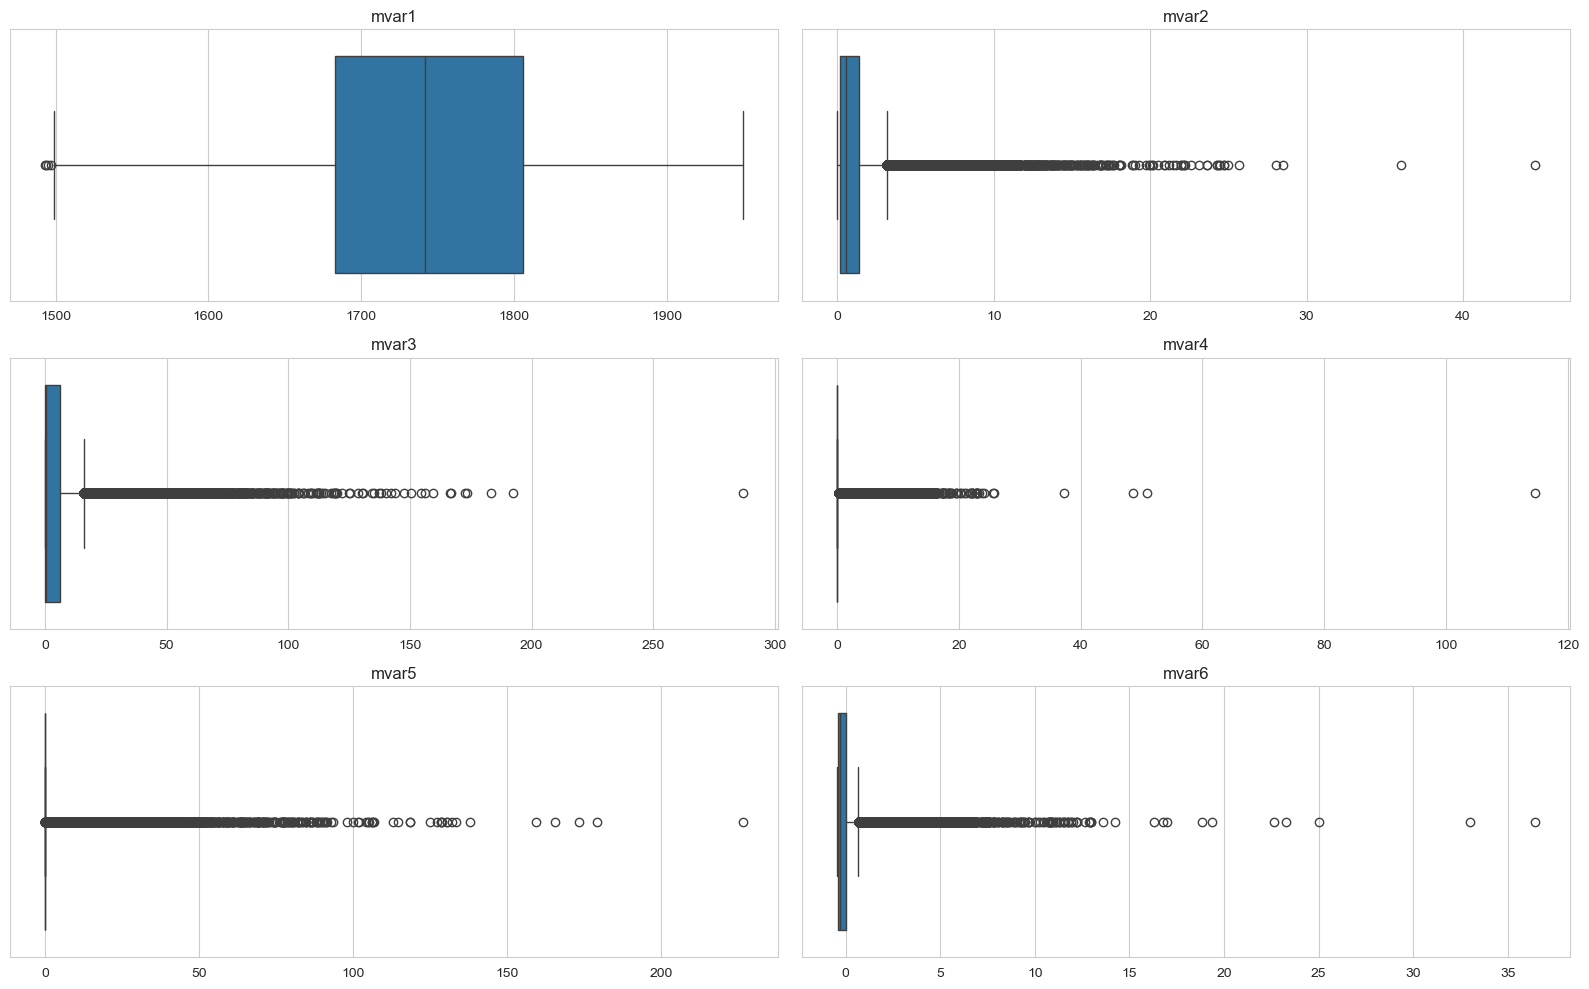

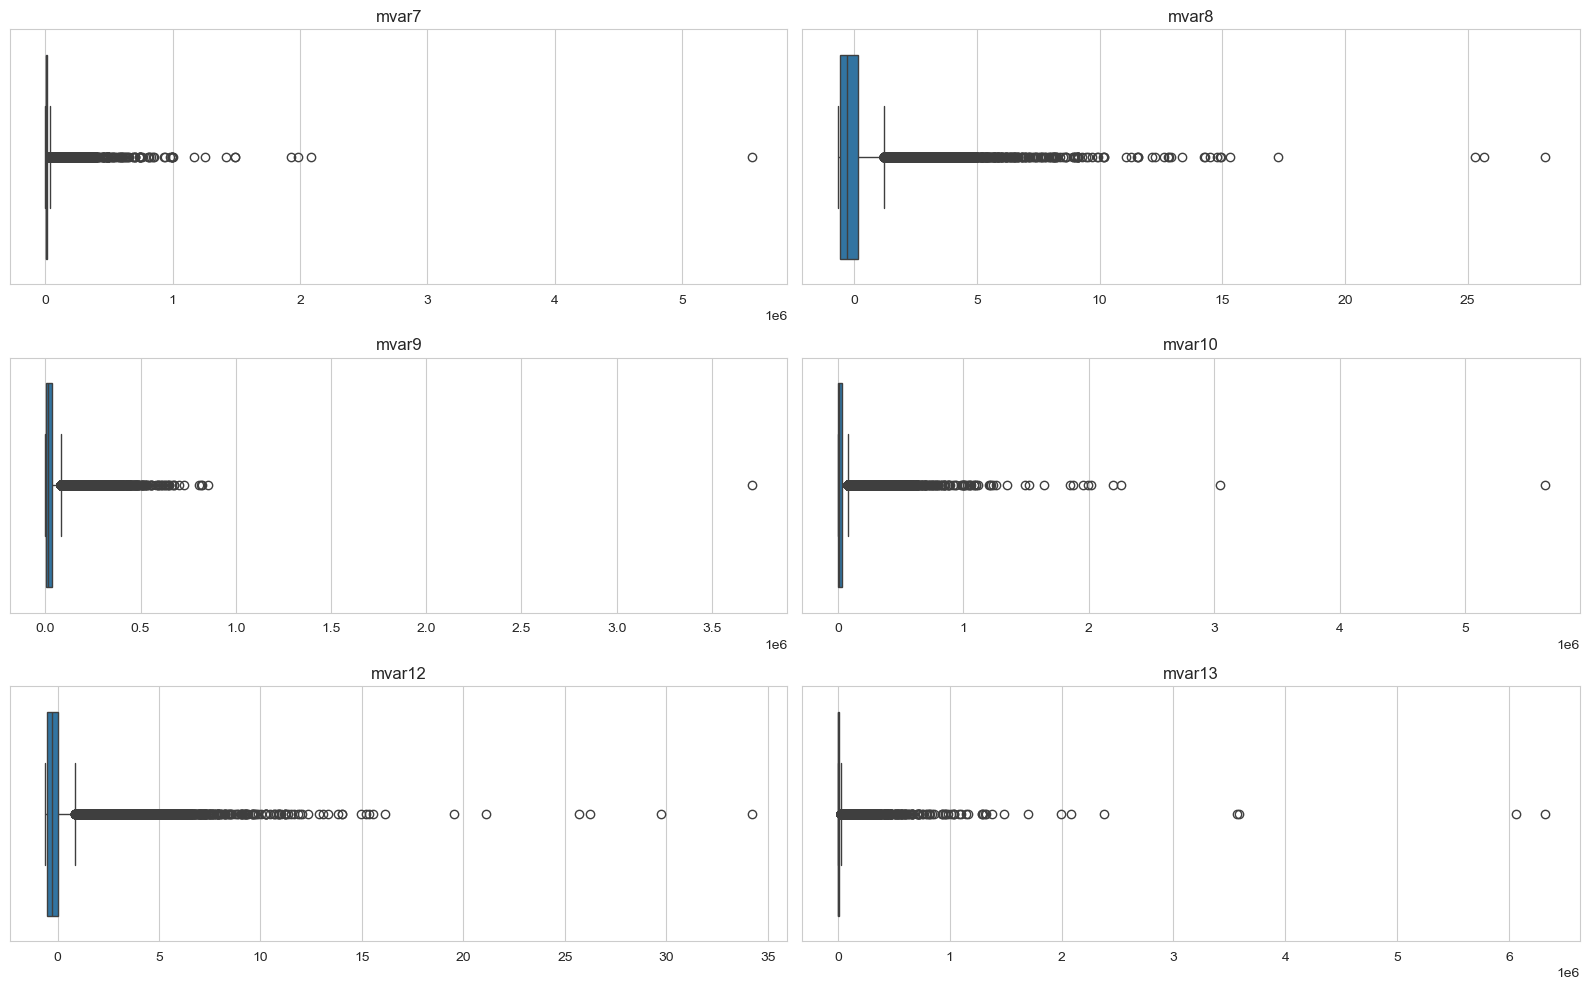

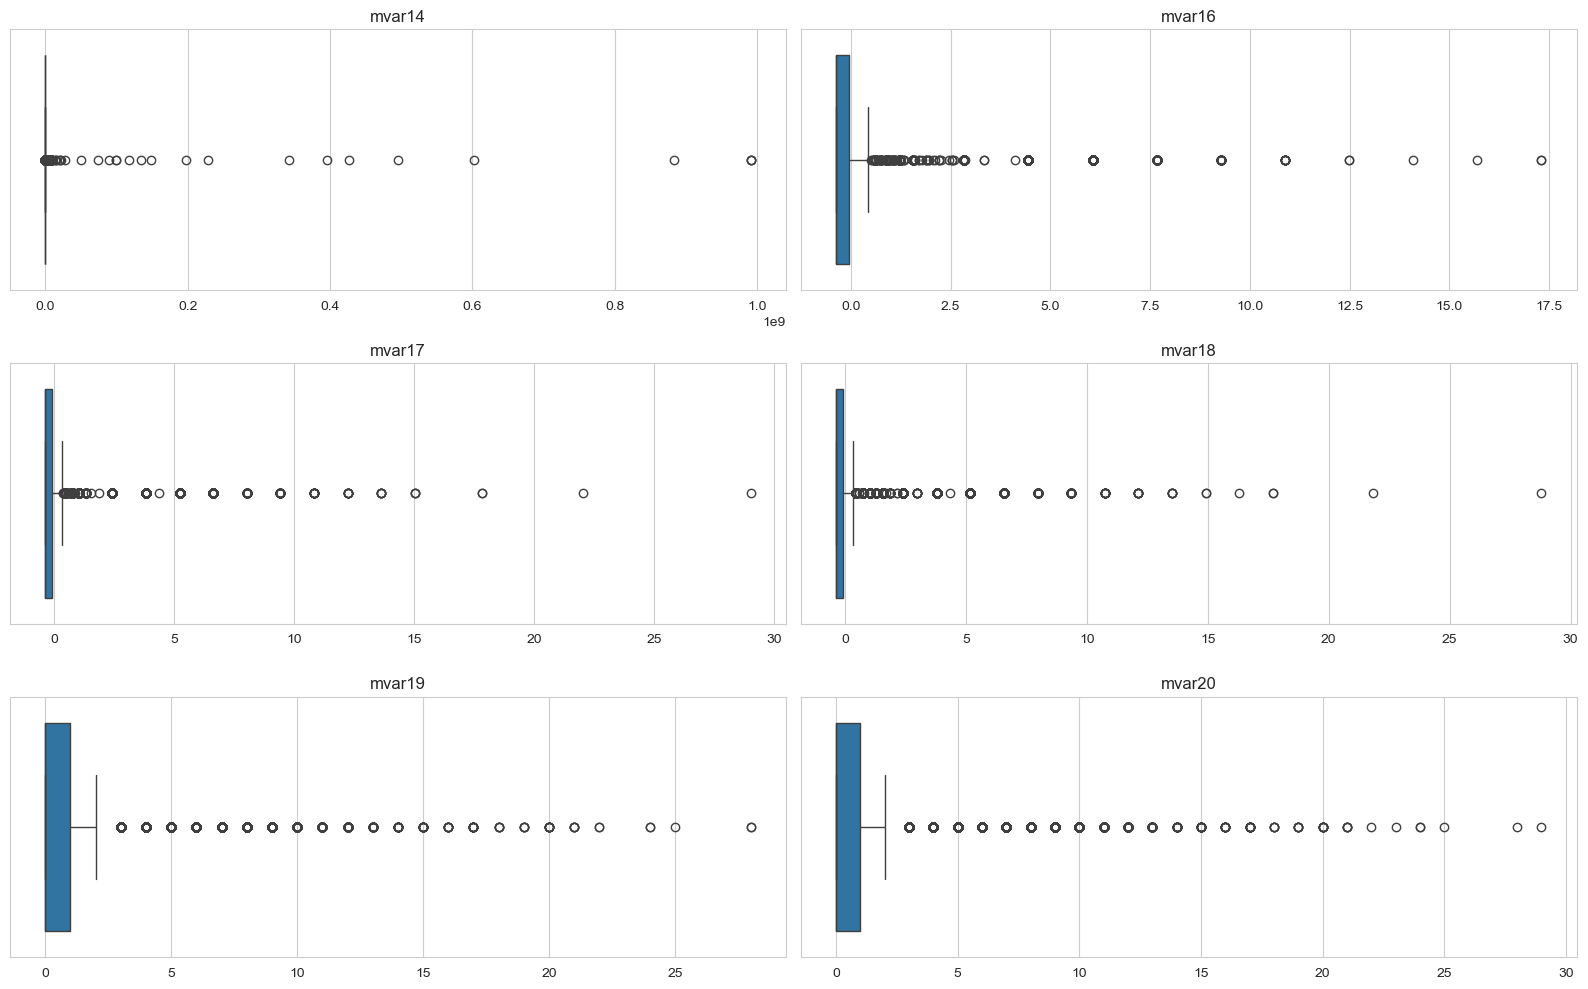

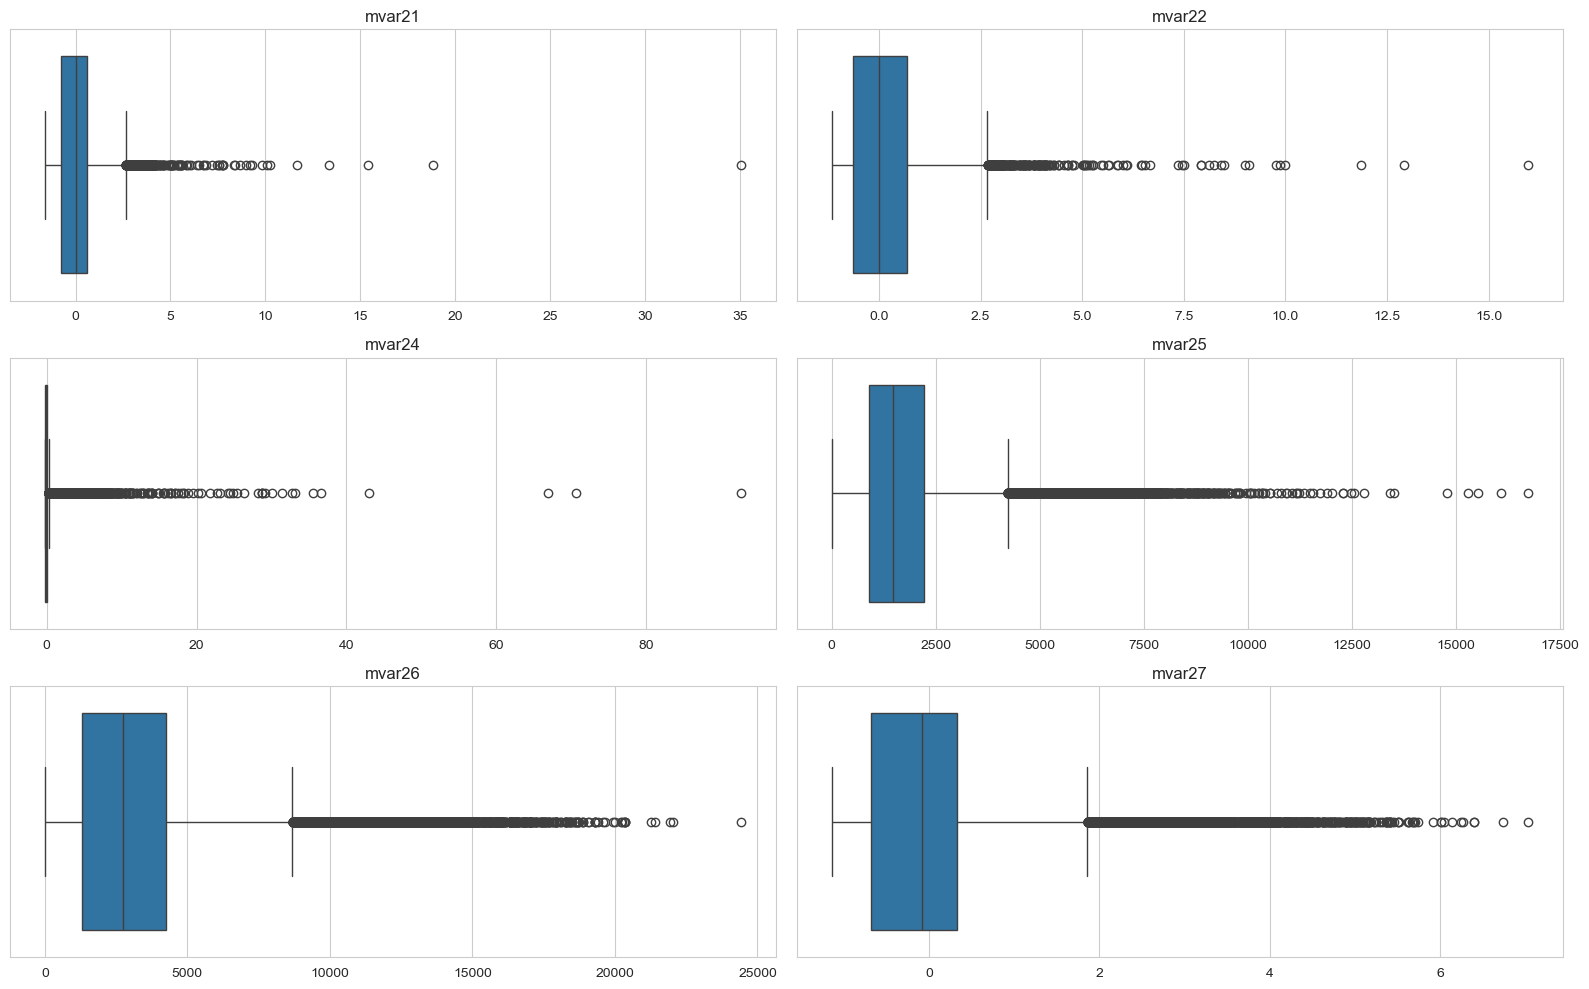

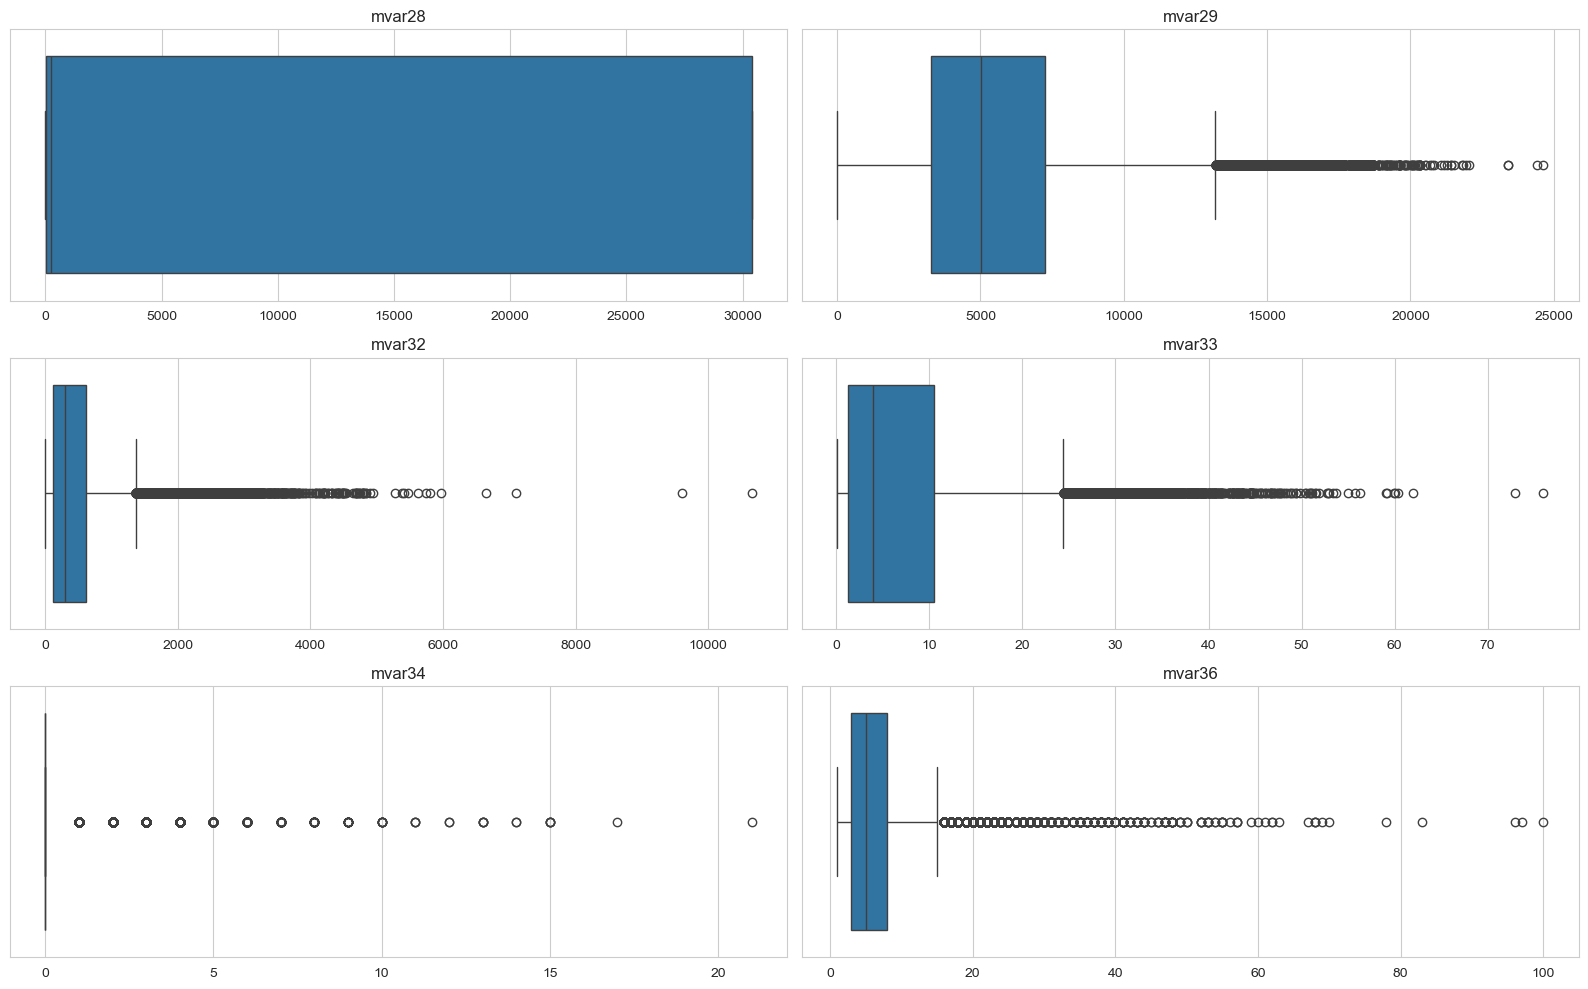

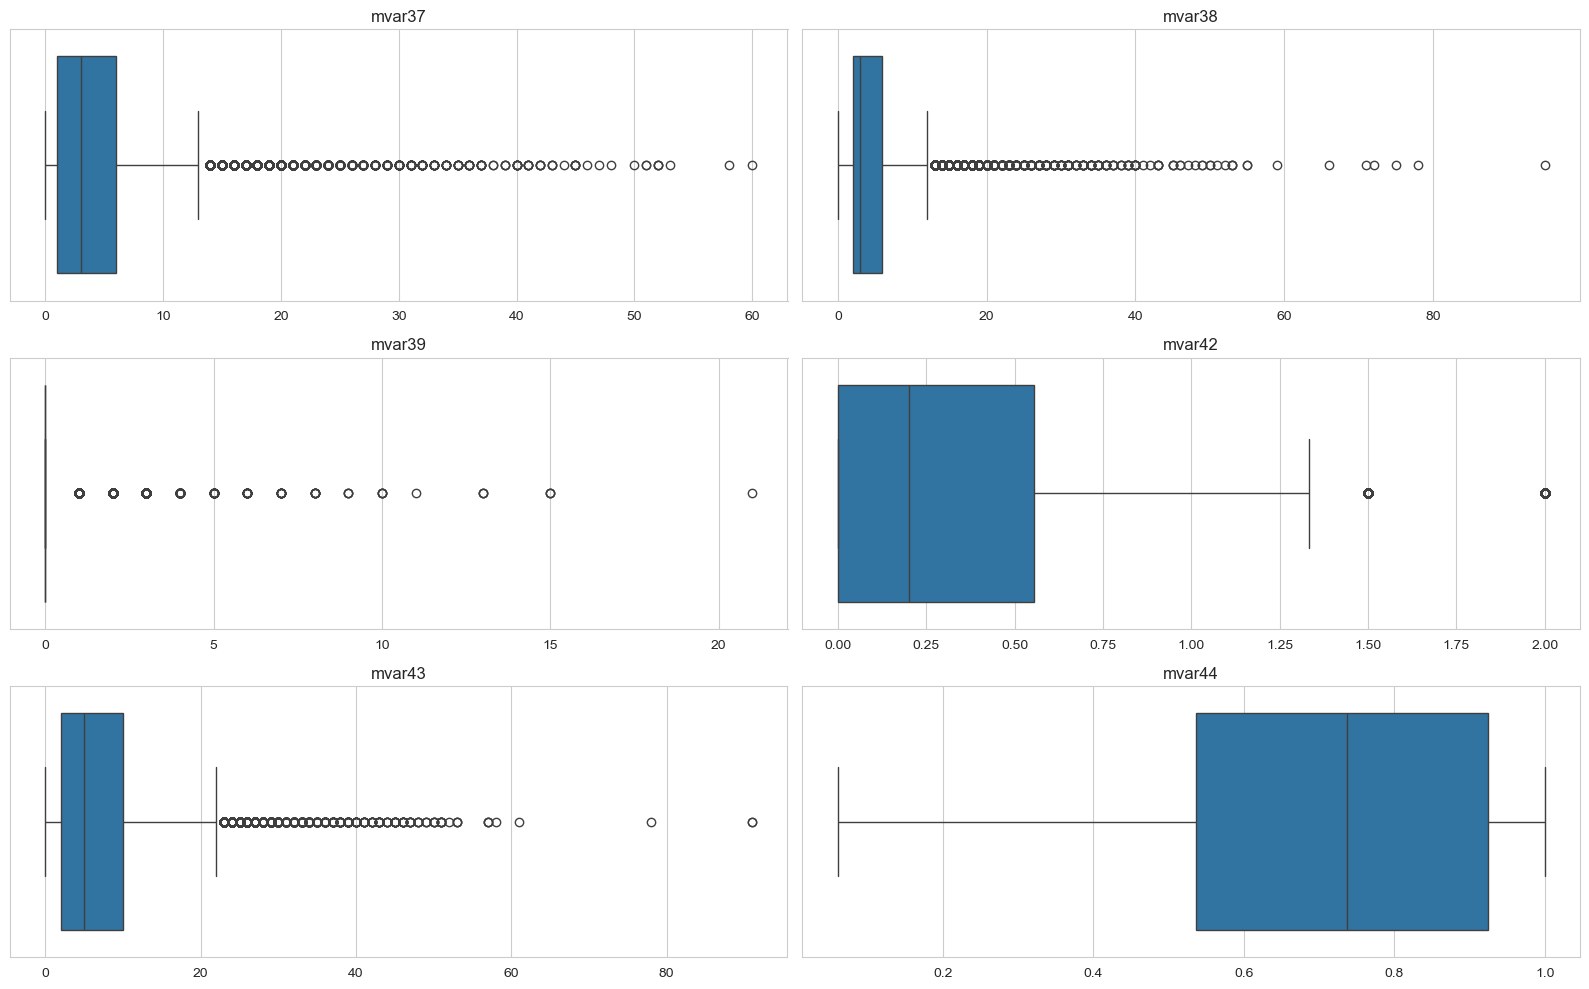

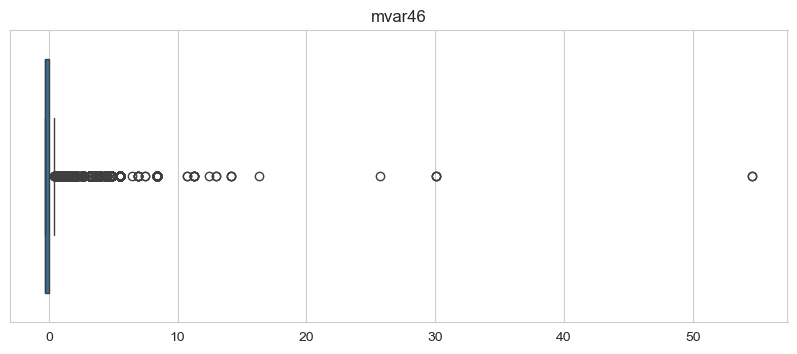

In [218]:

sns.set_style("whitegrid")

plots_per_page = 6

for start in range(0, len(num_cols), plots_per_page):

    subset = num_cols[start:start + plots_per_page]

    fig, axes = plt.subplots(3, 2, figsize=(16, 10))
    axes = axes.flatten()

    for ax, col in zip(axes, subset):
        sns.boxplot(
            x=df[col],
            ax=ax,
            showfliers=True  # IMPORTANT: avoids heavy rendering
        )
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Remove unused subplots
    for ax in axes[len(subset):]:
        ax.remove()

    plt.tight_layout()
    plt.show()


# Outlier Analysis

In [219]:
outlier_counts = {}
for i in num_df:
 data=df[i]
 q1=np.percentile(data,25)
 q2=np.percentile(data,50)
 q3=np.percentile(data,75)
    
 iqr=q3-q1
    
 lb=q1-1.5*iqr
 ub=q3+1.5*iqr
    
 con1=data<lb
 con2=data>ub
    
 con=con1 | con2
    
 outliers=data[con].values.tolist()
 outlier_counts[i]=con.sum()

# No. of outlier per columns

In [220]:
outlier_counts

{'mvar1': np.int64(4),
 'mvar2': np.int64(5873),
 'mvar3': np.int64(8431),
 'mvar4': np.int64(11024),
 'mvar5': np.int64(7702),
 'mvar6': np.int64(10679),
 'mvar7': np.int64(7218),
 'mvar8': np.int64(6782),
 'mvar9': np.int64(7962),
 'mvar10': np.int64(7683),
 'mvar12': np.int64(7130),
 'mvar13': np.int64(9296),
 'mvar14': np.int64(5688),
 'mvar16': np.int64(10976),
 'mvar17': np.int64(12216),
 'mvar18': np.int64(13470),
 'mvar19': np.int64(10038),
 'mvar20': np.int64(10807),
 'mvar21': np.int64(334),
 'mvar22': np.int64(241),
 'mvar24': np.int64(3466),
 'mvar25': np.int64(3549),
 'mvar26': np.int64(4350),
 'mvar27': np.int64(3970),
 'mvar28': np.int64(0),
 'mvar29': np.int64(2202),
 'mvar32': np.int64(4674),
 'mvar33': np.int64(3131),
 'mvar34': np.int64(12450),
 'mvar36': np.int64(4513),
 'mvar37': np.int64(3359),
 'mvar38': np.int64(3085),
 'mvar39': np.int64(5133),
 'mvar42': np.int64(731),
 'mvar43': np.int64(1963),
 'mvar44': np.int64(0),
 'mvar46': np.int64(12143)}

# Total outliers

In [221]:
No_Of_Outliers=sum(outlier_counts.values())
No_Of_Outliers

np.int64(222273)

# Treat the outliers by using winsorising

# Rechecking the outliers using box plots

# Correlation with Target only

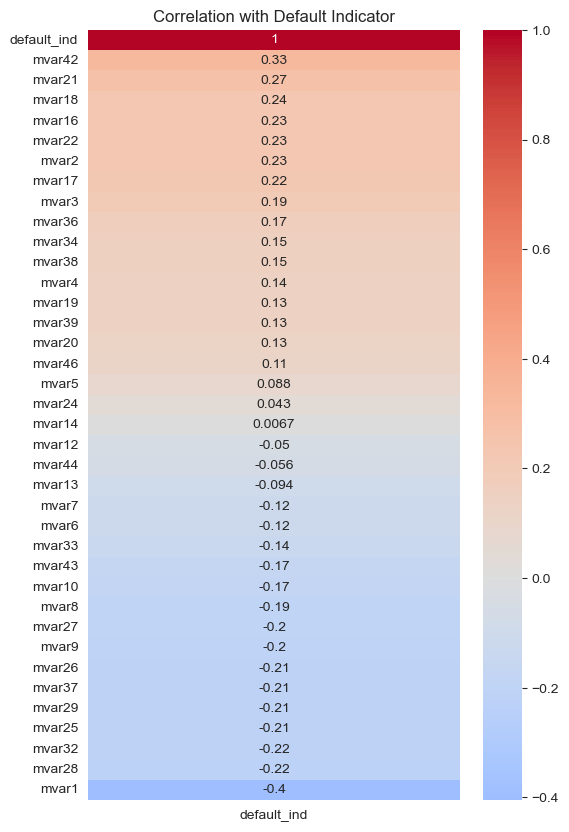

In [222]:
#Correlation with Target only
corr_target = (
    df.select_dtypes(include='number')
      .corr()['default_ind']
      .sort_values(ascending=False)
)

plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_target.to_frame(),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Correlation with Default Indicator')
plt.show()

**Check if there are constant value in the num data columns**

In [223]:
# A constant columns(only one unique value) provides no information.
num_df.nunique()

mvar1       454
mvar2     24695
mvar3     18302
mvar4      3694
mvar5      4030
mvar6     11359
mvar7     28564
mvar8     20029
mvar9     29578
mvar10    39640
mvar12    21424
mvar13    27225
mvar14     1566
mvar16      210
mvar17      199
mvar18      100
mvar19       26
mvar20       28
mvar21    18551
mvar22    45561
mvar24    16094
mvar25     5425
mvar26      619
mvar27     2648
mvar28       97
mvar29      668
mvar32     2837
mvar33      575
mvar34       18
mvar36       70
mvar37       55
mvar38       61
mvar39       15
mvar42     1084
mvar43       59
mvar44    42700
mvar46      216
dtype: int64

# Convert Catagorical column to numerical by using 'one_hot encoder'

In [224]:
cat

['mvar47', 'default_ind']

In [225]:
df['mvar47'] = df['mvar47'].map({'C': 0, 'L': 1})


In [226]:
df.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar17',
       'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22', 'mvar24', 'mvar25',
       'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar32', 'mvar33', 'mvar34',
       'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar42', 'mvar43', 'mvar44',
       'mvar46', 'mvar47', 'default_ind'],
      dtype='object')

In [227]:
df['mvar47']

0        0
1        1
2        0
3        1
4        1
        ..
79995    0
79996    0
79997    0
79998    1
79999    0
Name: mvar47, Length: 80000, dtype: int64

# Scaling the data

In [228]:
num_df.dtypes

mvar1     float64
mvar2     float64
mvar3     float64
mvar4     float64
mvar5     float64
mvar6     float64
mvar7     float64
mvar8     float64
mvar9     float64
mvar10    float64
mvar12    float64
mvar13    float64
mvar14      int64
mvar16    float64
mvar17    float64
mvar18    float64
mvar19    float64
mvar20    float64
mvar21    float64
mvar22    float64
mvar24    float64
mvar25    float64
mvar26    float64
mvar27    float64
mvar28    float64
mvar29    float64
mvar32    float64
mvar33    float64
mvar34    float64
mvar36    float64
mvar37    float64
mvar38    float64
mvar39    float64
mvar42    float64
mvar43    float64
mvar44    float64
mvar46    float64
dtype: object

In [229]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in num_df:
 scale_data=ss.fit_transform(df[[i]])
 df[i]=scale_data

In [230]:
df

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,mvar47,default_ind
0,-0.539059,0.368837,-0.486601,-0.263285,-0.186988,-0.513347,-0.235739,-0.697798,0.182579,-0.178342,...,0.314509,1.313169,-0.070410,2.268137,-0.658994,0.551393,-0.296623,-0.403730,0,0
1,1.084923,-0.161131,-0.486601,-0.263285,-0.186988,-0.484745,-0.201997,-0.382655,-0.260892,-0.249252,...,0.314509,-0.924231,-0.576318,-0.207894,-0.892924,1.029051,-0.299317,1.624013,1,1
2,-0.008558,-0.418020,-0.486601,-0.263285,-0.186988,-0.360520,-0.313122,0.020893,-0.342293,-0.415374,...,-1.032774,-0.253011,-0.829272,-0.207894,-0.892924,-0.881582,1.247076,-0.403730,0,1
3,-0.073517,-0.531468,-0.486601,-0.263285,-0.186988,0.042439,0.218570,-0.185316,-0.219179,0.099309,...,-0.647836,-0.253011,-0.576318,-0.207894,-0.479053,-0.563143,-0.752365,-0.403730,1,0
4,0.446157,-0.661670,-0.465746,-0.263285,-0.186988,1.015205,-0.247328,-0.125695,-0.466188,-0.383129,...,-0.840305,-0.253011,-0.576318,-0.207894,-0.892924,-0.881582,0.933427,0.103206,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-0.105997,0.695063,-0.486601,-0.263285,-0.186988,-0.510263,-0.275042,-0.558976,-0.358160,-0.353645,...,-0.455367,-0.924231,-0.070410,-0.207894,-0.892924,-0.403924,-1.154827,-0.403730,0,0
79996,-0.235915,-0.669074,-0.383900,0.165524,-0.186988,-0.513347,1.054922,-0.733417,-0.407306,0.813270,...,-0.262898,-0.476751,0.182544,-0.207894,-0.444566,1.188270,-0.551818,-0.403730,0,0
79997,-1.524274,-0.487043,0.584989,0.259885,0.310899,0.335215,-0.318883,-0.398686,-0.546788,-0.368006,...,0.122040,-0.924231,0.182544,4.744167,0.452123,-0.403924,-1.230086,-0.403730,0,1
79998,0.370371,0.075993,-0.486601,-0.263285,-0.186988,-0.513347,-0.228154,-0.202241,-0.561974,-0.181836,...,-0.262898,-0.924231,0.941407,-0.207894,-0.729878,0.392173,-0.751937,-0.403730,1,0
